# Simulate Gaussian Resolution 
The purpose of this notebook is to generate Gaussian curves based on provided qQ (from file) and store the curve to another file (the format of this file is still subject of discussion 

Steps:
1. Load CanSAS file using SasView loader
2. Generate Gaussian curves based on dQ
3. Set fixed number of points to store curve
4. Store generated curves to file (custom format that can be used for testing - not CanSAS yet)

In [20]:
from sas.sascalc.dataloader.loader import Loader
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

### Load data (test data that has dQ column/entry)

In [5]:
loader = Loader()
data = loader.load("../src/sas/sasview/test/1d_data/latex_smeared.xml")

q = data[0].x
I = data[0].y
dq = data[0].dx
dI = data[0].dy

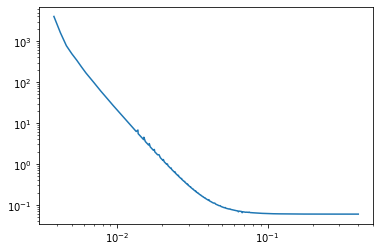

In [12]:
plt.plot(q, I)
plt.yscale('log')
plt.xscale('log')

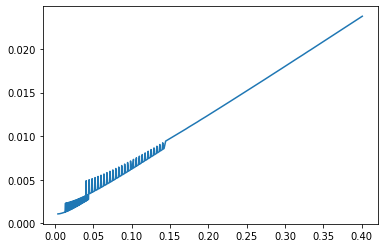

In [14]:
plt.plot(q, dq)

### Generating curves using `scipy stats` function

In [51]:
gauss_curves = []
x_axis = np.arange(-0.1, 0.1, 0.005)

In [52]:
len(x_axis)

40

In [53]:
for index, sigma in enumerate(dq):
    gauss_curves.append(stats.norm.pdf(x_axis,0,sigma))

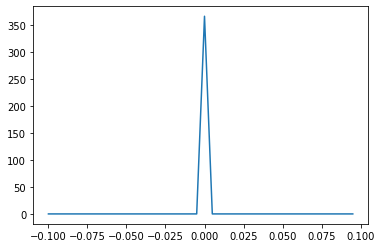

In [54]:
plt.plot(x_axis, gauss_curves[0])

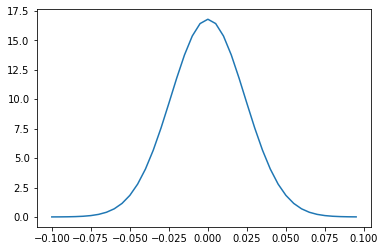

In [55]:
plt.plot(x_axis, gauss_curves[-1])

## TODO: Save to text file to generate 